In [ ]:
%pip install astropy

In [29]:
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
oids = np.memmap('/media3/majumder/zwaad/zwad/slsn_data/oid_cut30_short_r_300.dat', mode='r+', dtype=np.uint64)
with open('/media3/majumder/zwaad/zwad/slsn_data/feature_short_r_300.name') as f:
    fnames = f.read().split()
dtype = [(name, np.float32) for name in fnames]
features = np.memmap('/media3/majumder/zwaad/zwad/slsn_data/feature_cut30_short_r_300.dat', mode='r', dtype=dtype, shape=oids.shape)

In [8]:
n_samples = int(0.5*oids.shape[0])
n_samples

6880606

In [9]:
features_df = pd.DataFrame(features[:n_samples])
oids_df = pd.DataFrame(oids[:n_samples], columns=["oid"])
hist_df = pd.concat([oids_df, features_df], axis=1)
hist_df.to_csv('/media3/majumder/zwaad/zwad/slsn_data/hist_data.csv.gz', compression="gzip", index=False)

In [10]:
df= pd.read_csv('/media3/majumder/zwaad/zwad/slsn_data/hist_data.csv.gz', compression="gzip")
df.head(10)

,oid,amplitude_magn_r,anderson_darling_normal_magn_r,beyond_1_std_magn_r,beyond_2_std_magn_r,cusum_magn_r,eta_e_magn_r,inter_percentile_range_2_magn_r,inter_percentile_range_10_magn_r,inter_percentile_range_25_magn_r,...,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,eta_e_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,chi2_flux_r,skew_flux_r,stetson_K_flux_r
0,864214300001871,0.406670,1.945918,0.252033,0.043360,0.051767,639081.06,0.331104,0.186409,0.096491,...,19.221792,2.816147,0.050662,640364.06,0.001392,7.664501,0.076330,1.284930,1.175275,0.728384
1,864214300001898,0.303494,1.149142,0.260388,0.041551,0.080044,694153.50,0.307230,0.178818,0.087957,...,19.295063,1.572726,0.079759,691928.20,0.000008,3.220603,0.070428,0.989745,0.694204,0.745824
2,864214300001728,0.113195,2.565694,0.250667,0.053333,0.096560,450021.44,0.123690,0.062325,0.031792,...,17.539240,2.141121,0.096259,450553.62,0.000202,1.789129,0.025419,1.472596,-0.488396,0.757437
3,864214300002193,0.101408,0.995332,0.274667,0.045333,0.101276,426592.90,0.105907,0.059402,0.031889,...,17.398650,0.926317,0.100841,435598.78,0.000168,1.857298,0.023461,1.445680,-0.177054,0.755282
4,864214300002062,0.089115,0.468347,0.312000,0.050667,0.085662,579896.30,0.124607,0.077120,0.039007,...,17.898634,0.563158,0.085624,573561.94,0.000095,0.284142,0.027737,1.138411,0.181705,0.777307
5,864214300009300,0.057445,3.316422,0.250667,0.050667,0.151378,177985.56,0.069965,0.035644,0.017705,...,14.817090,2.990113,0.151501,179808.22,0.000089,2.168386,0.014316,1.812891,-0.797948,0.744057
6,864214300009365,0.066527,4.396925,0.227273,0.056150,0.134039,161860.66,0.079125,0.039319,0.019633,...,13.375017,3.981607,0.133728,166394.11,0.000134,2.355228,0.015975,2.177692,-0.873564,0.728294
7,864214300002189,0.197701,0.471346,0.282258,0.045699,0.113519,618457.70,0.240957,0.144978,0.074850,...,18.879894,0.672964,0.114183,625429.56,0.000267,0.562817,0.053824,1.099204,0.170226,0.784965
8,864214300002159,0.067125,2.115403,0.245333,0.045333,0.100245,205124.60,0.081951,0.042133,0.021574,...,15.983058,1.830062,0.099972,208469.61,0.000129,1.780727,0.016546,1.928264,-0.690100,0.754915
9,864214300015300,0.343309,0.715450,0.297297,0.054054,0.064978,1008791.00,0.442722,0.254236,0.123188,...,19.644022,1.229935,0.064784,973721.50,0.000111,1.028754,0.092736,1.005193,0.440221,0.760550


In [16]:
priors = [676202300024545, 
            685208400000922,
            367202200013320,
            294202200005471,
            564206300013071,
            388201200030634,
            763205100038185,
            829213400044066,
            830216400044921,
            689212300032140,
            688209400039752,
            1729201400023934,
            821202400019642,
            791213100013510,
            792216100000865,
            765203200020079,
            574209400003534,
            575212300012517,
            694215300007877,
            758215100025024,
            756213400010875,
            757216400025865,
            576208400005830,
            1642216400028194,
            629216400000685,
            634210400021472,
            683202200008908,
            765202100038246,
            815215100009239,
            760214100025069,
            756207300001552,
            574211300027730,
            547212200011772,
            250208300018885,
            249205400014552,
            765206200003680,
            789212300014493,
            788209300023458,
            752210400015819,
            1789201300001286,
            790212100011207,
            623208100016917,
            304204400005857,
            822210300019023,
            865206200014558,
            566209300022264,
            294212100004406,
            1639208200011528,
            821207100004043,
            847209200012956]


prior_index = [np.where(oids==i)[0] for i in priors]
index = list()
for i in prior_index:
    if i.size>0:
        index.append(i[0])
oids[index]

array([821202400019642, 791213100013510, 792216100000865, 634210400021472,
       756207300001552, 789212300014493, 790212100011207, 822210300019023],
      dtype=uint64)

In [24]:
prior_df = pd.DataFrame()
prior_df = pd.concat([prior_df, pd.concat([pd.DataFrame(oids[index], columns=["oid"]), pd.DataFrame(features[index])], axis=1)], axis=0)
prior_df

,oid,amplitude_magn_r,anderson_darling_normal_magn_r,beyond_1_std_magn_r,beyond_2_std_magn_r,cusum_magn_r,eta_e_magn_r,inter_percentile_range_2_magn_r,inter_percentile_range_10_magn_r,inter_percentile_range_25_magn_r,...,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,eta_e_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,chi2_flux_r,skew_flux_r,stetson_K_flux_r
0,821202400019642,0.776817,21.160419,0.263789,0.071942,0.383961,31471.052734,1.290880,1.040581,0.475252,...,18.671555,35.502117,0.372958,19828.787109,0.157742,0.838221,0.400237,55.146526,1.419457,0.776617
1,791213100013510,0.836125,18.894201,0.301887,0.007075,0.416894,38655.160156,1.335608,1.115797,0.661179,...,18.563225,31.253336,0.412820,20361.089844,0.175417,-0.379878,0.422088,58.214355,1.021665,0.826429
2,792216100000865,0.810839,15.763998,0.355330,0.001692,0.428013,408465.187500,1.371895,1.140654,0.658302,...,18.505964,27.484175,0.419028,238429.468750,0.162490,-0.728064,0.405717,71.820290,0.765296,0.856484
3,634210400021472,0.929646,71.935577,0.232075,0.054717,0.420618,5060.895508,1.722166,1.510326,0.614161,...,18.443916,87.884445,0.412409,2028.189941,0.461367,0.175895,0.680450,203.147278,1.371974,0.774316
4,756207300001552,0.933963,34.108608,0.324324,0.000000,0.439331,58919.160156,1.631891,1.427851,1.111217,...,18.877888,47.835453,0.437452,22149.830078,0.334454,-0.851420,0.582436,58.297096,0.951365,0.838798
5,789212300014493,1.138567,14.454213,0.467320,0.000000,0.461942,55001.250000,2.118771,1.818487,1.436497,...,18.953960,17.676077,0.455977,28902.675781,0.397993,-1.254517,0.636557,51.168720,0.518875,0.888676
6,790212100011207,1.253646,22.519569,0.308989,0.016854,0.443864,36840.394531,1.737642,1.431723,0.998045,...,19.152889,30.835461,0.418958,17188.148438,0.372780,1.711485,0.616050,45.963501,1.380550,0.828503
7,822210300019023,0.694422,20.908768,0.172147,0.040619,0.294192,82814.039062,0.681562,0.331083,0.169882,...,18.990528,37.356346,0.265877,56280.191406,0.032852,26.159109,0.188681,10.512312,4.089237,0.644750


In [25]:
df_copy = df.iloc[:,1:]
df_copy.shape

(6880606, 53)

In [26]:
df_copy.head()

,amplitude_magn_r,anderson_darling_normal_magn_r,beyond_1_std_magn_r,beyond_2_std_magn_r,cusum_magn_r,eta_e_magn_r,inter_percentile_range_2_magn_r,inter_percentile_range_10_magn_r,inter_percentile_range_25_magn_r,kurtosis_magn_r,...,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,eta_e_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,chi2_flux_r,skew_flux_r,stetson_K_flux_r
0,0.406670,1.945918,0.252033,0.043360,0.051767,639081.06,0.331104,0.186409,0.096491,4.360545,...,19.221792,2.816147,0.050662,640364.06,0.001392,7.664501,0.076330,1.284930,1.175275,0.728384
1,0.303494,1.149142,0.260388,0.041551,0.080044,694153.50,0.307230,0.178818,0.087957,2.122847,...,19.295063,1.572726,0.079759,691928.20,0.000008,3.220603,0.070428,0.989745,0.694204,0.745824
2,0.113195,2.565694,0.250667,0.053333,0.096560,450021.44,0.123690,0.062325,0.031792,1.949001,...,17.539240,2.141121,0.096259,450553.62,0.000202,1.789129,0.025419,1.472596,-0.488396,0.757437
3,0.101408,0.995332,0.274667,0.045333,0.101276,426592.90,0.105907,0.059402,0.031889,2.068923,...,17.398650,0.926317,0.100841,435598.78,0.000168,1.857298,0.023461,1.445680,-0.177054,0.755282
4,0.089115,0.468347,0.312000,0.050667,0.085662,579896.30,0.124607,0.077120,0.039007,0.250577,...,17.898634,0.563158,0.085624,573561.94,0.000095,0.284142,0.027737,1.138411,0.181705,0.777307


In [27]:
p_lower = np.percentile(df_copy.iloc[:,2].values, 1.0)
p_upper = np.percentile(df_copy.iloc[:,2].values, 99.0)
p_lower, p_upper, prior_df.iloc[:,3].max()

(np.float64(0.200489), np.float64(0.3280899), np.float32(0.46732026))

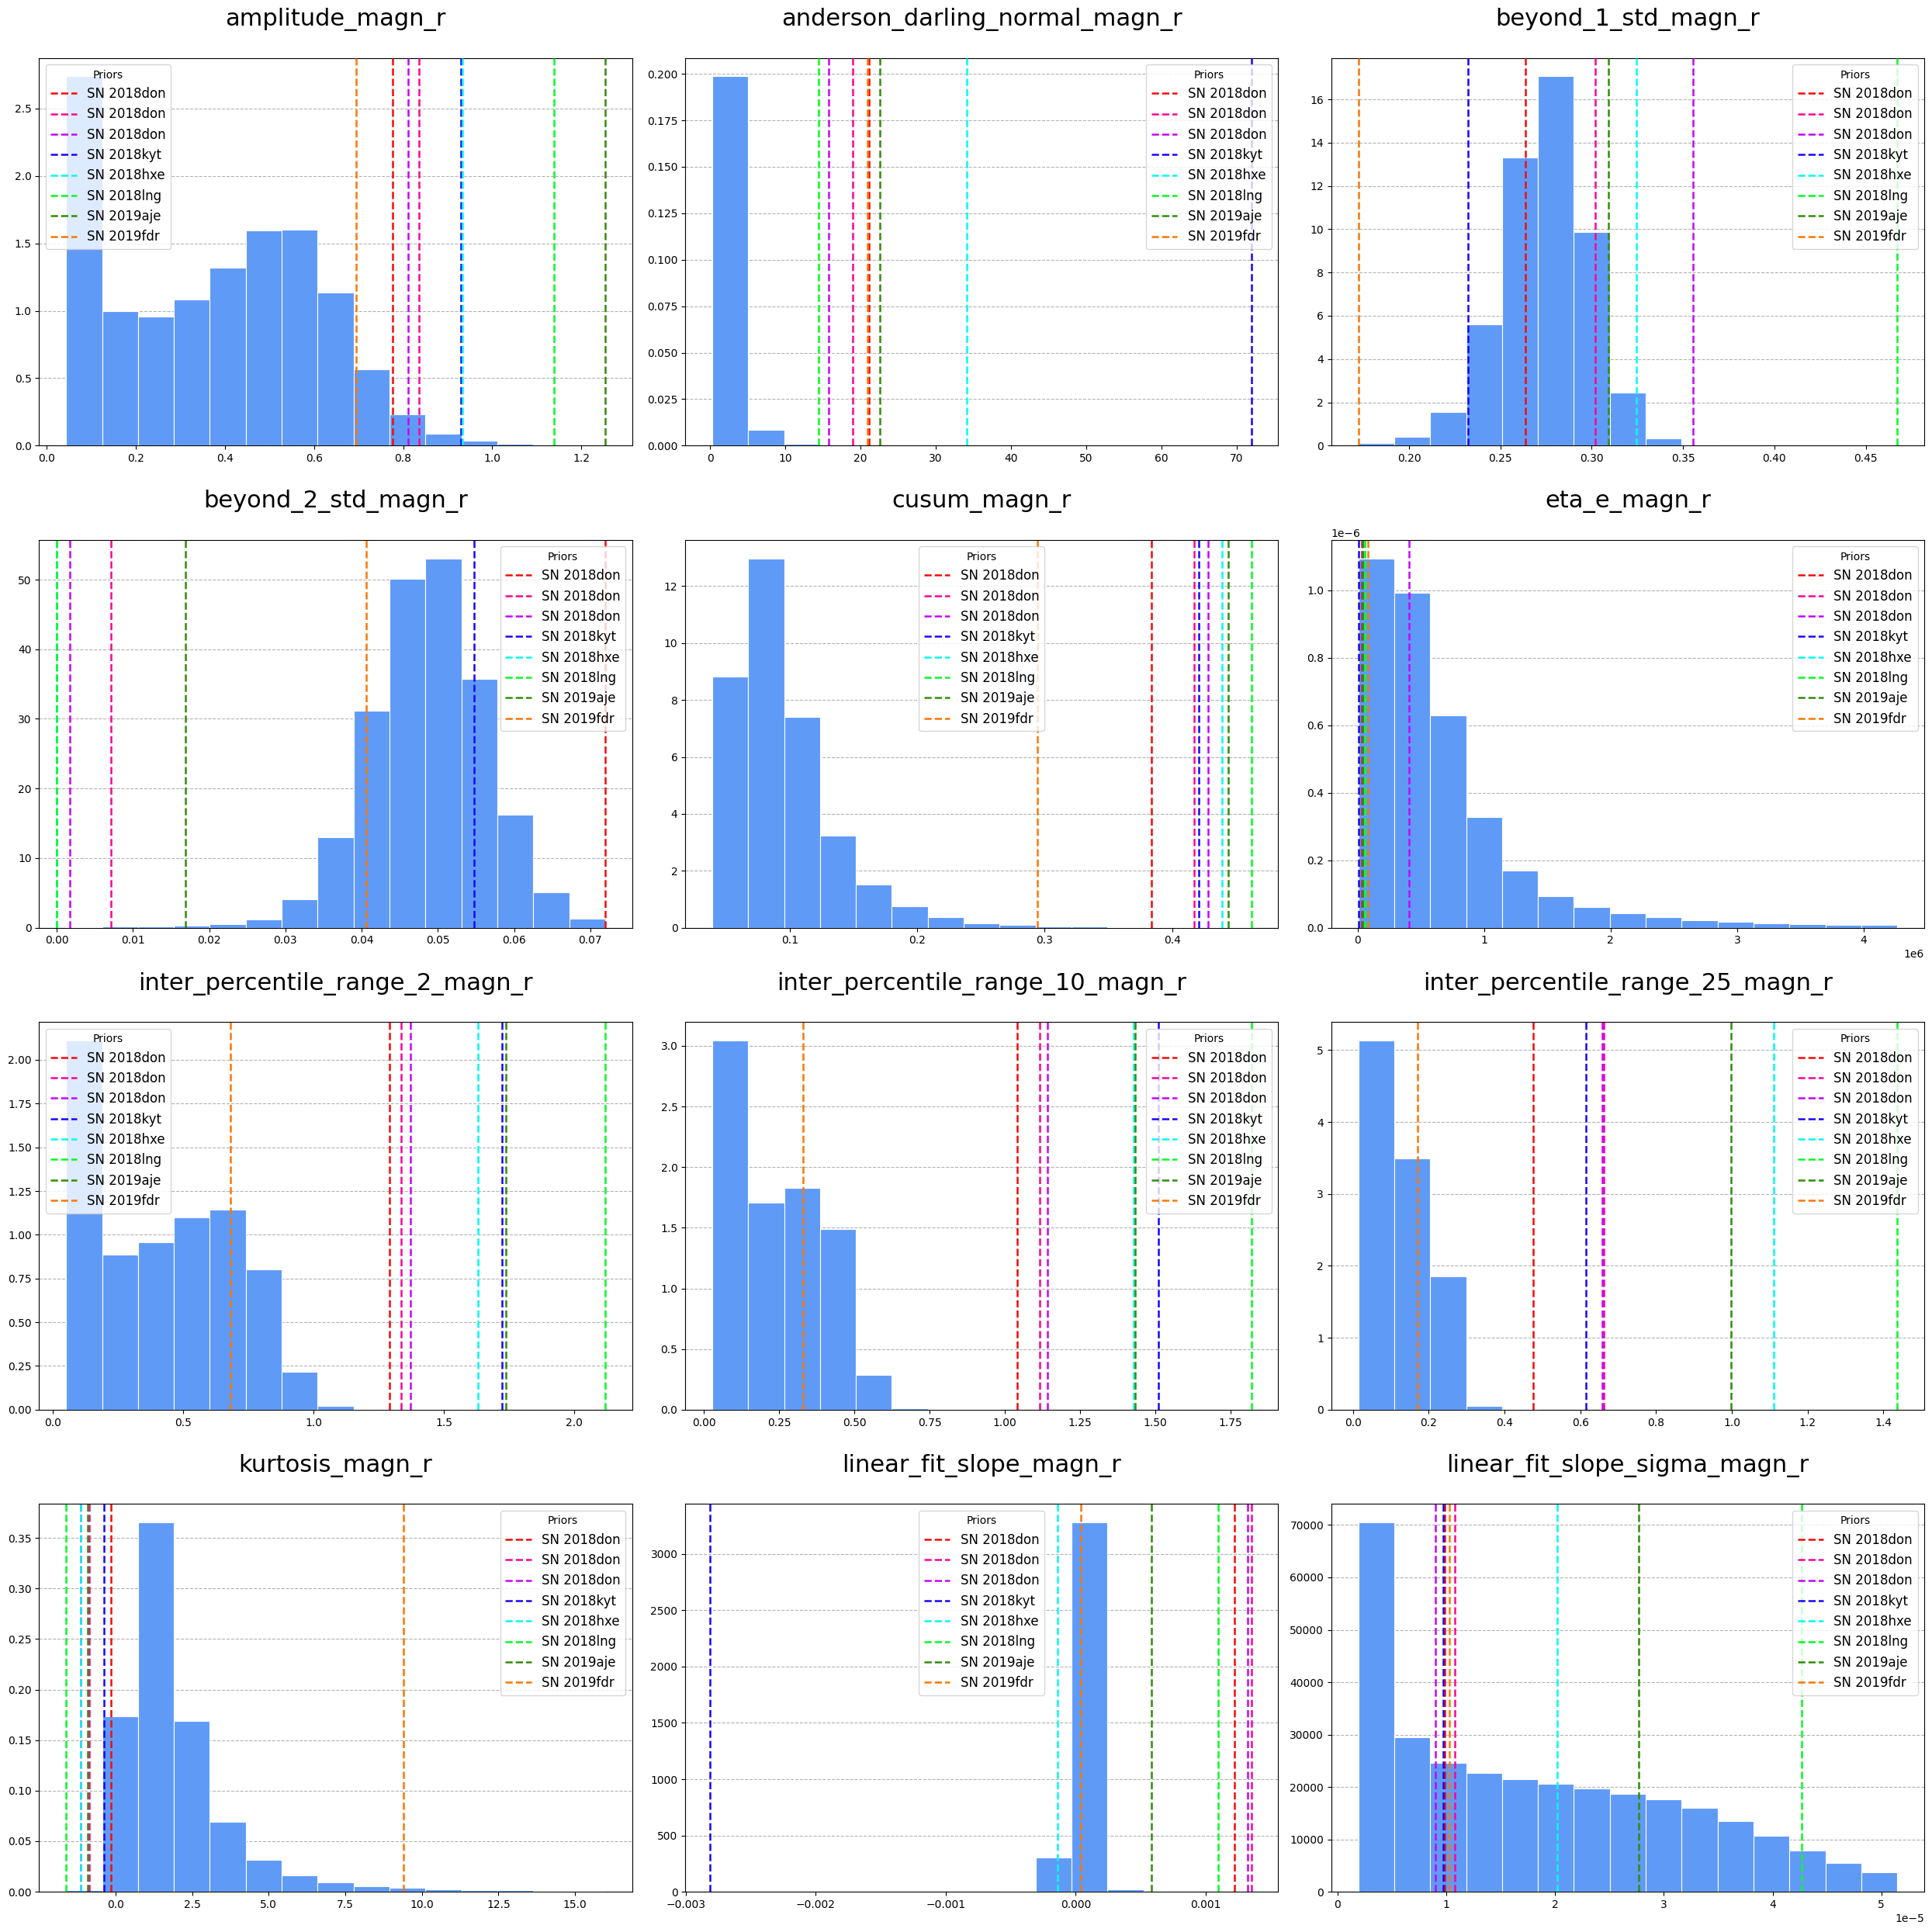

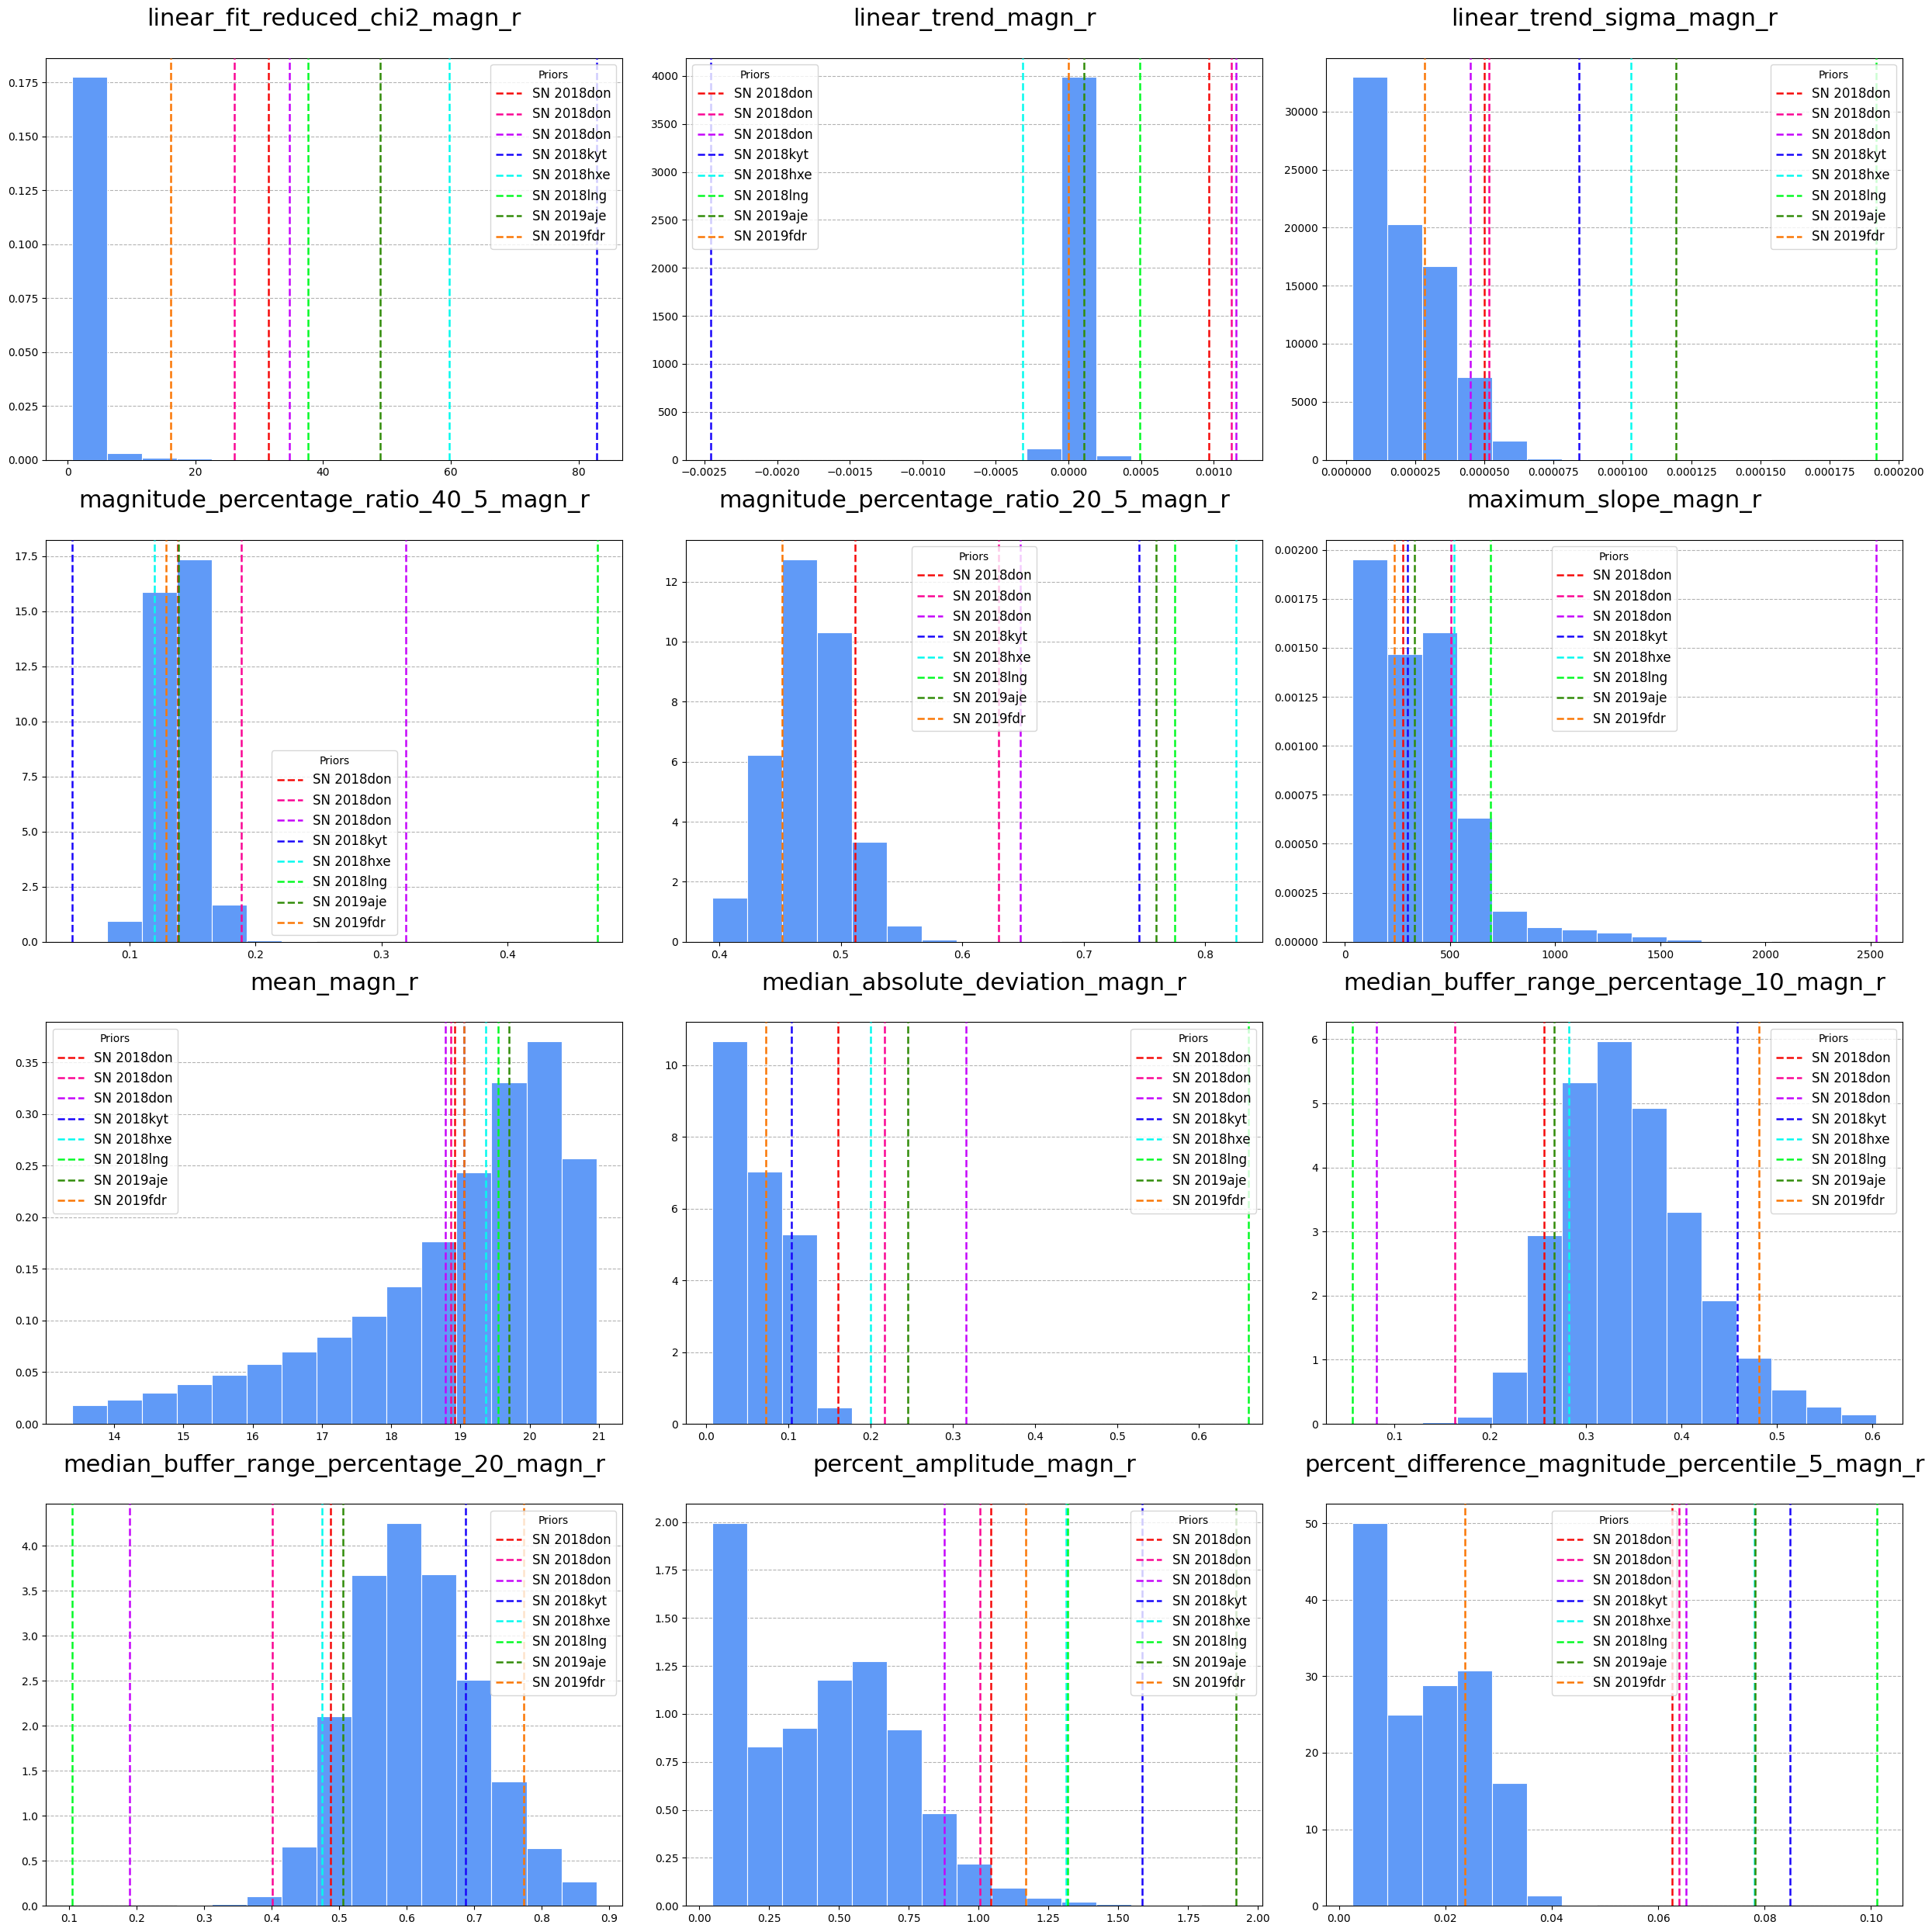

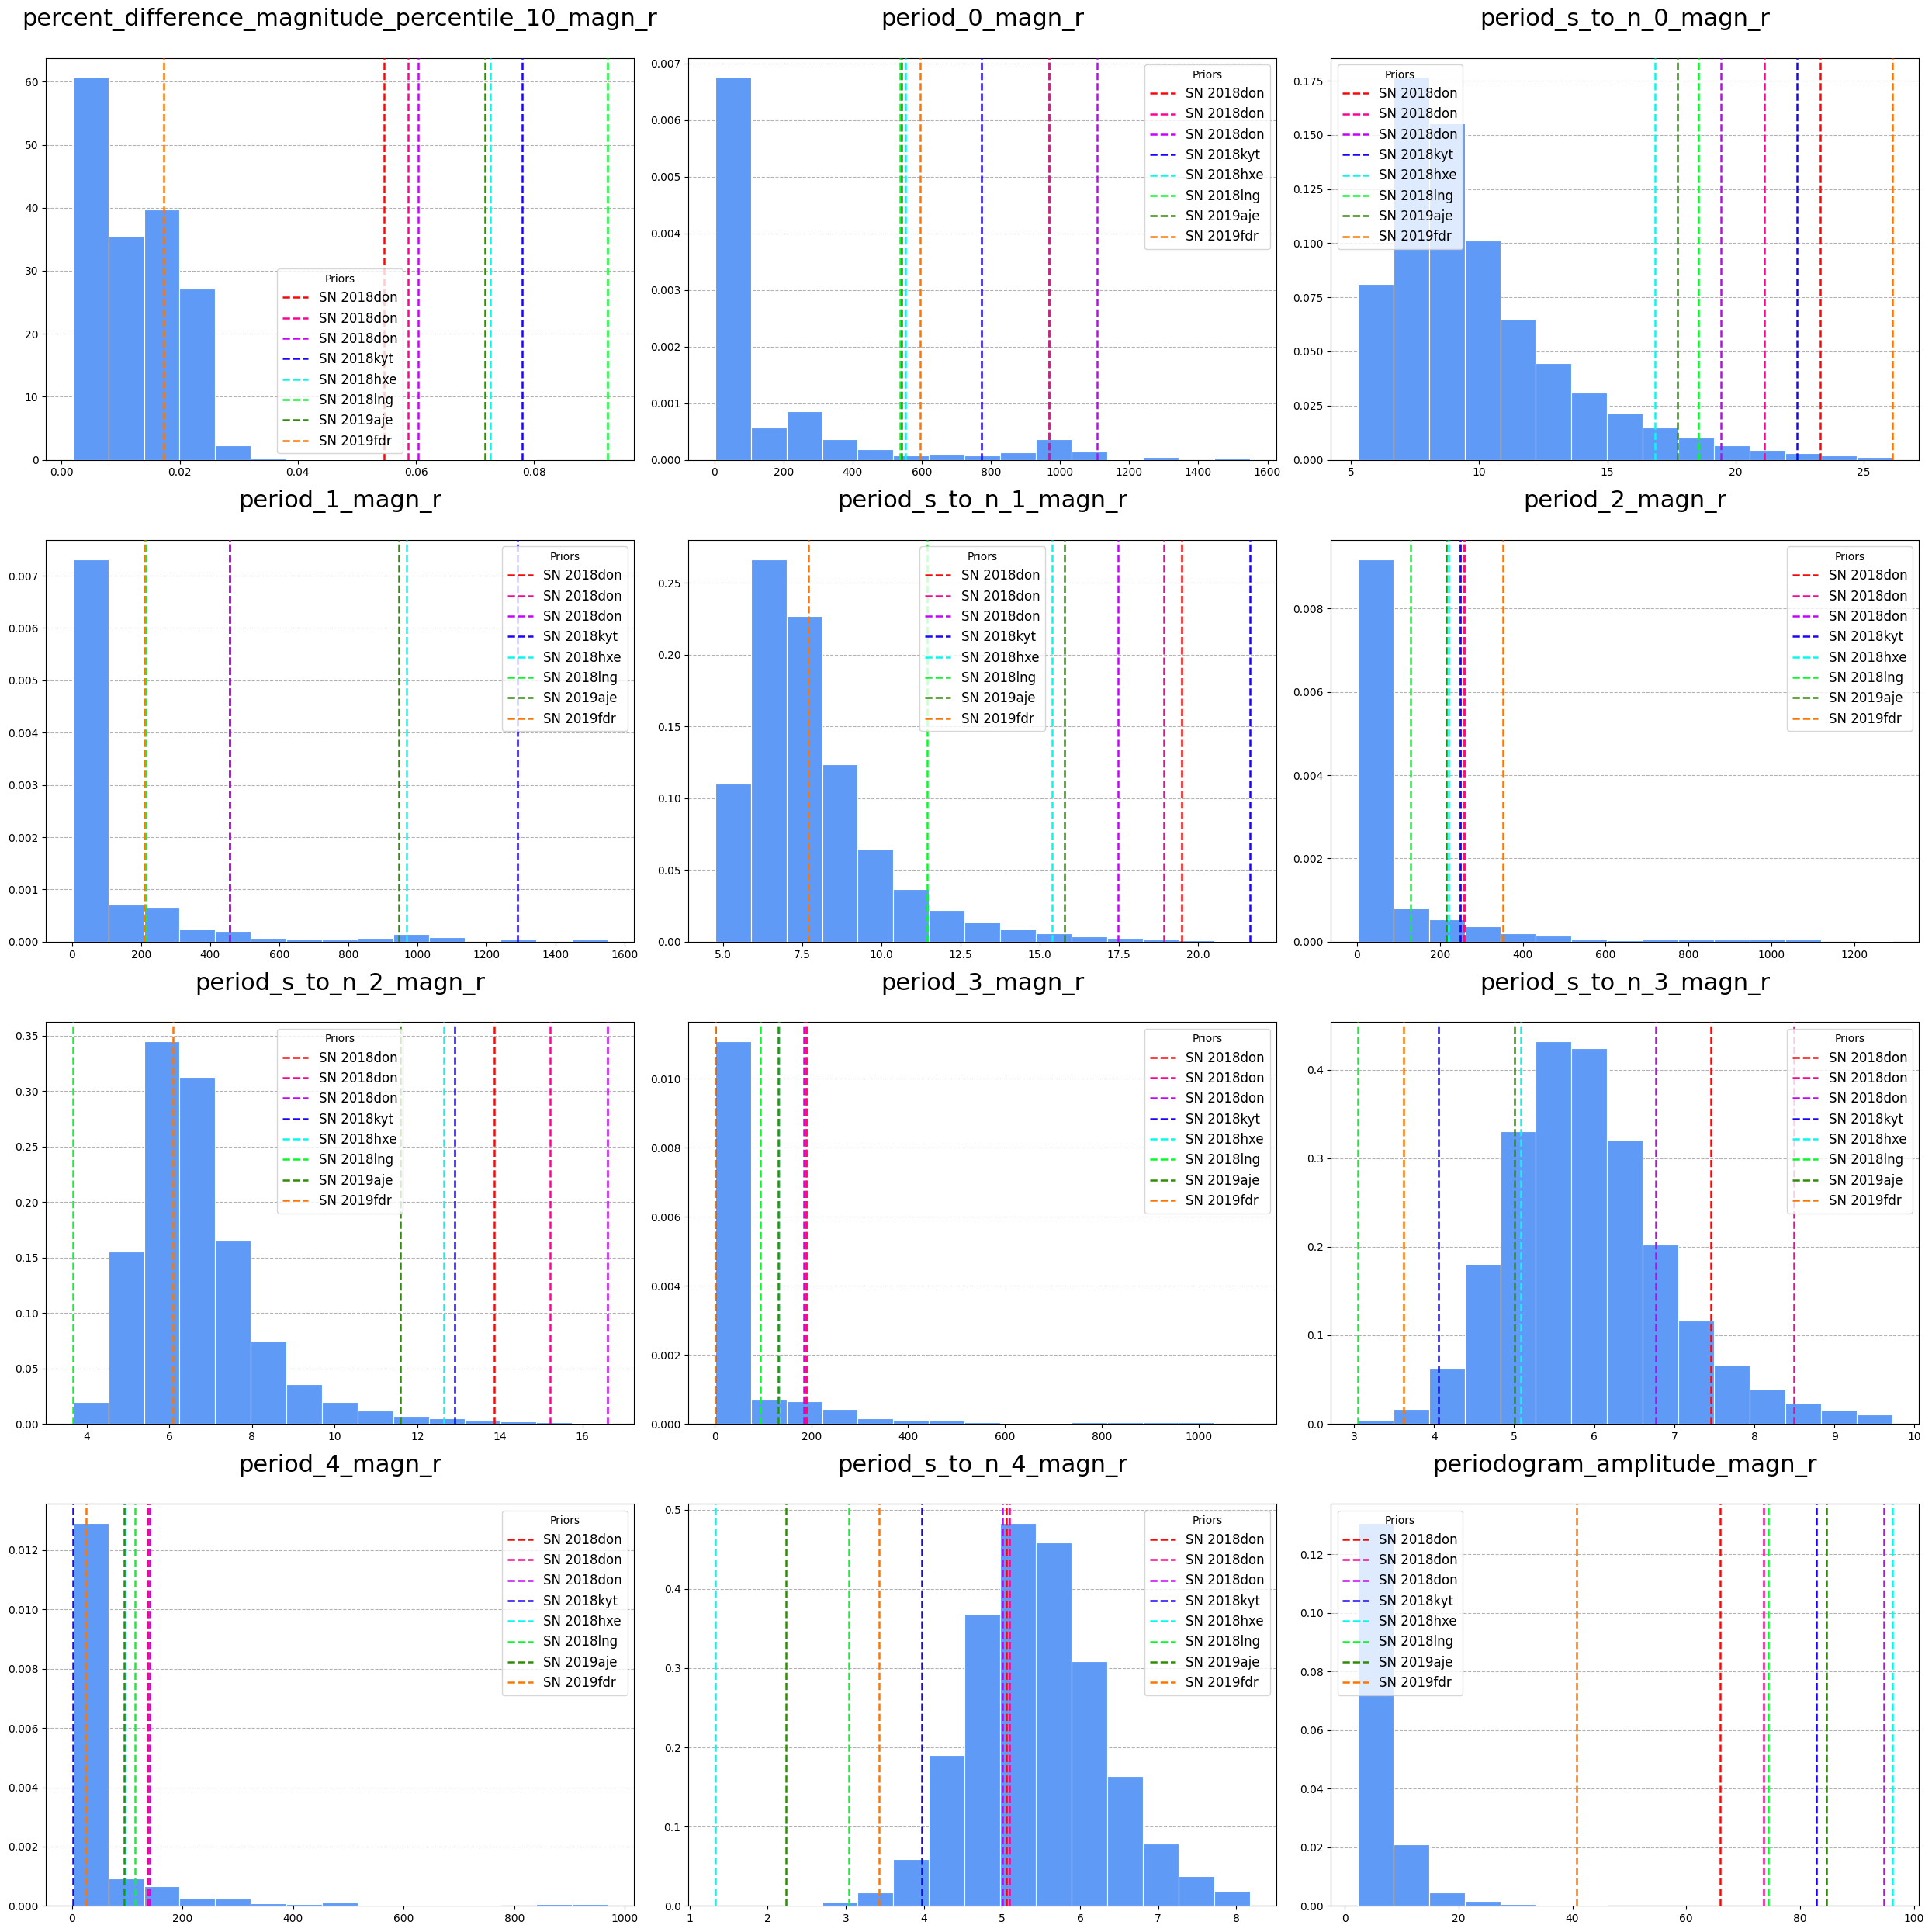

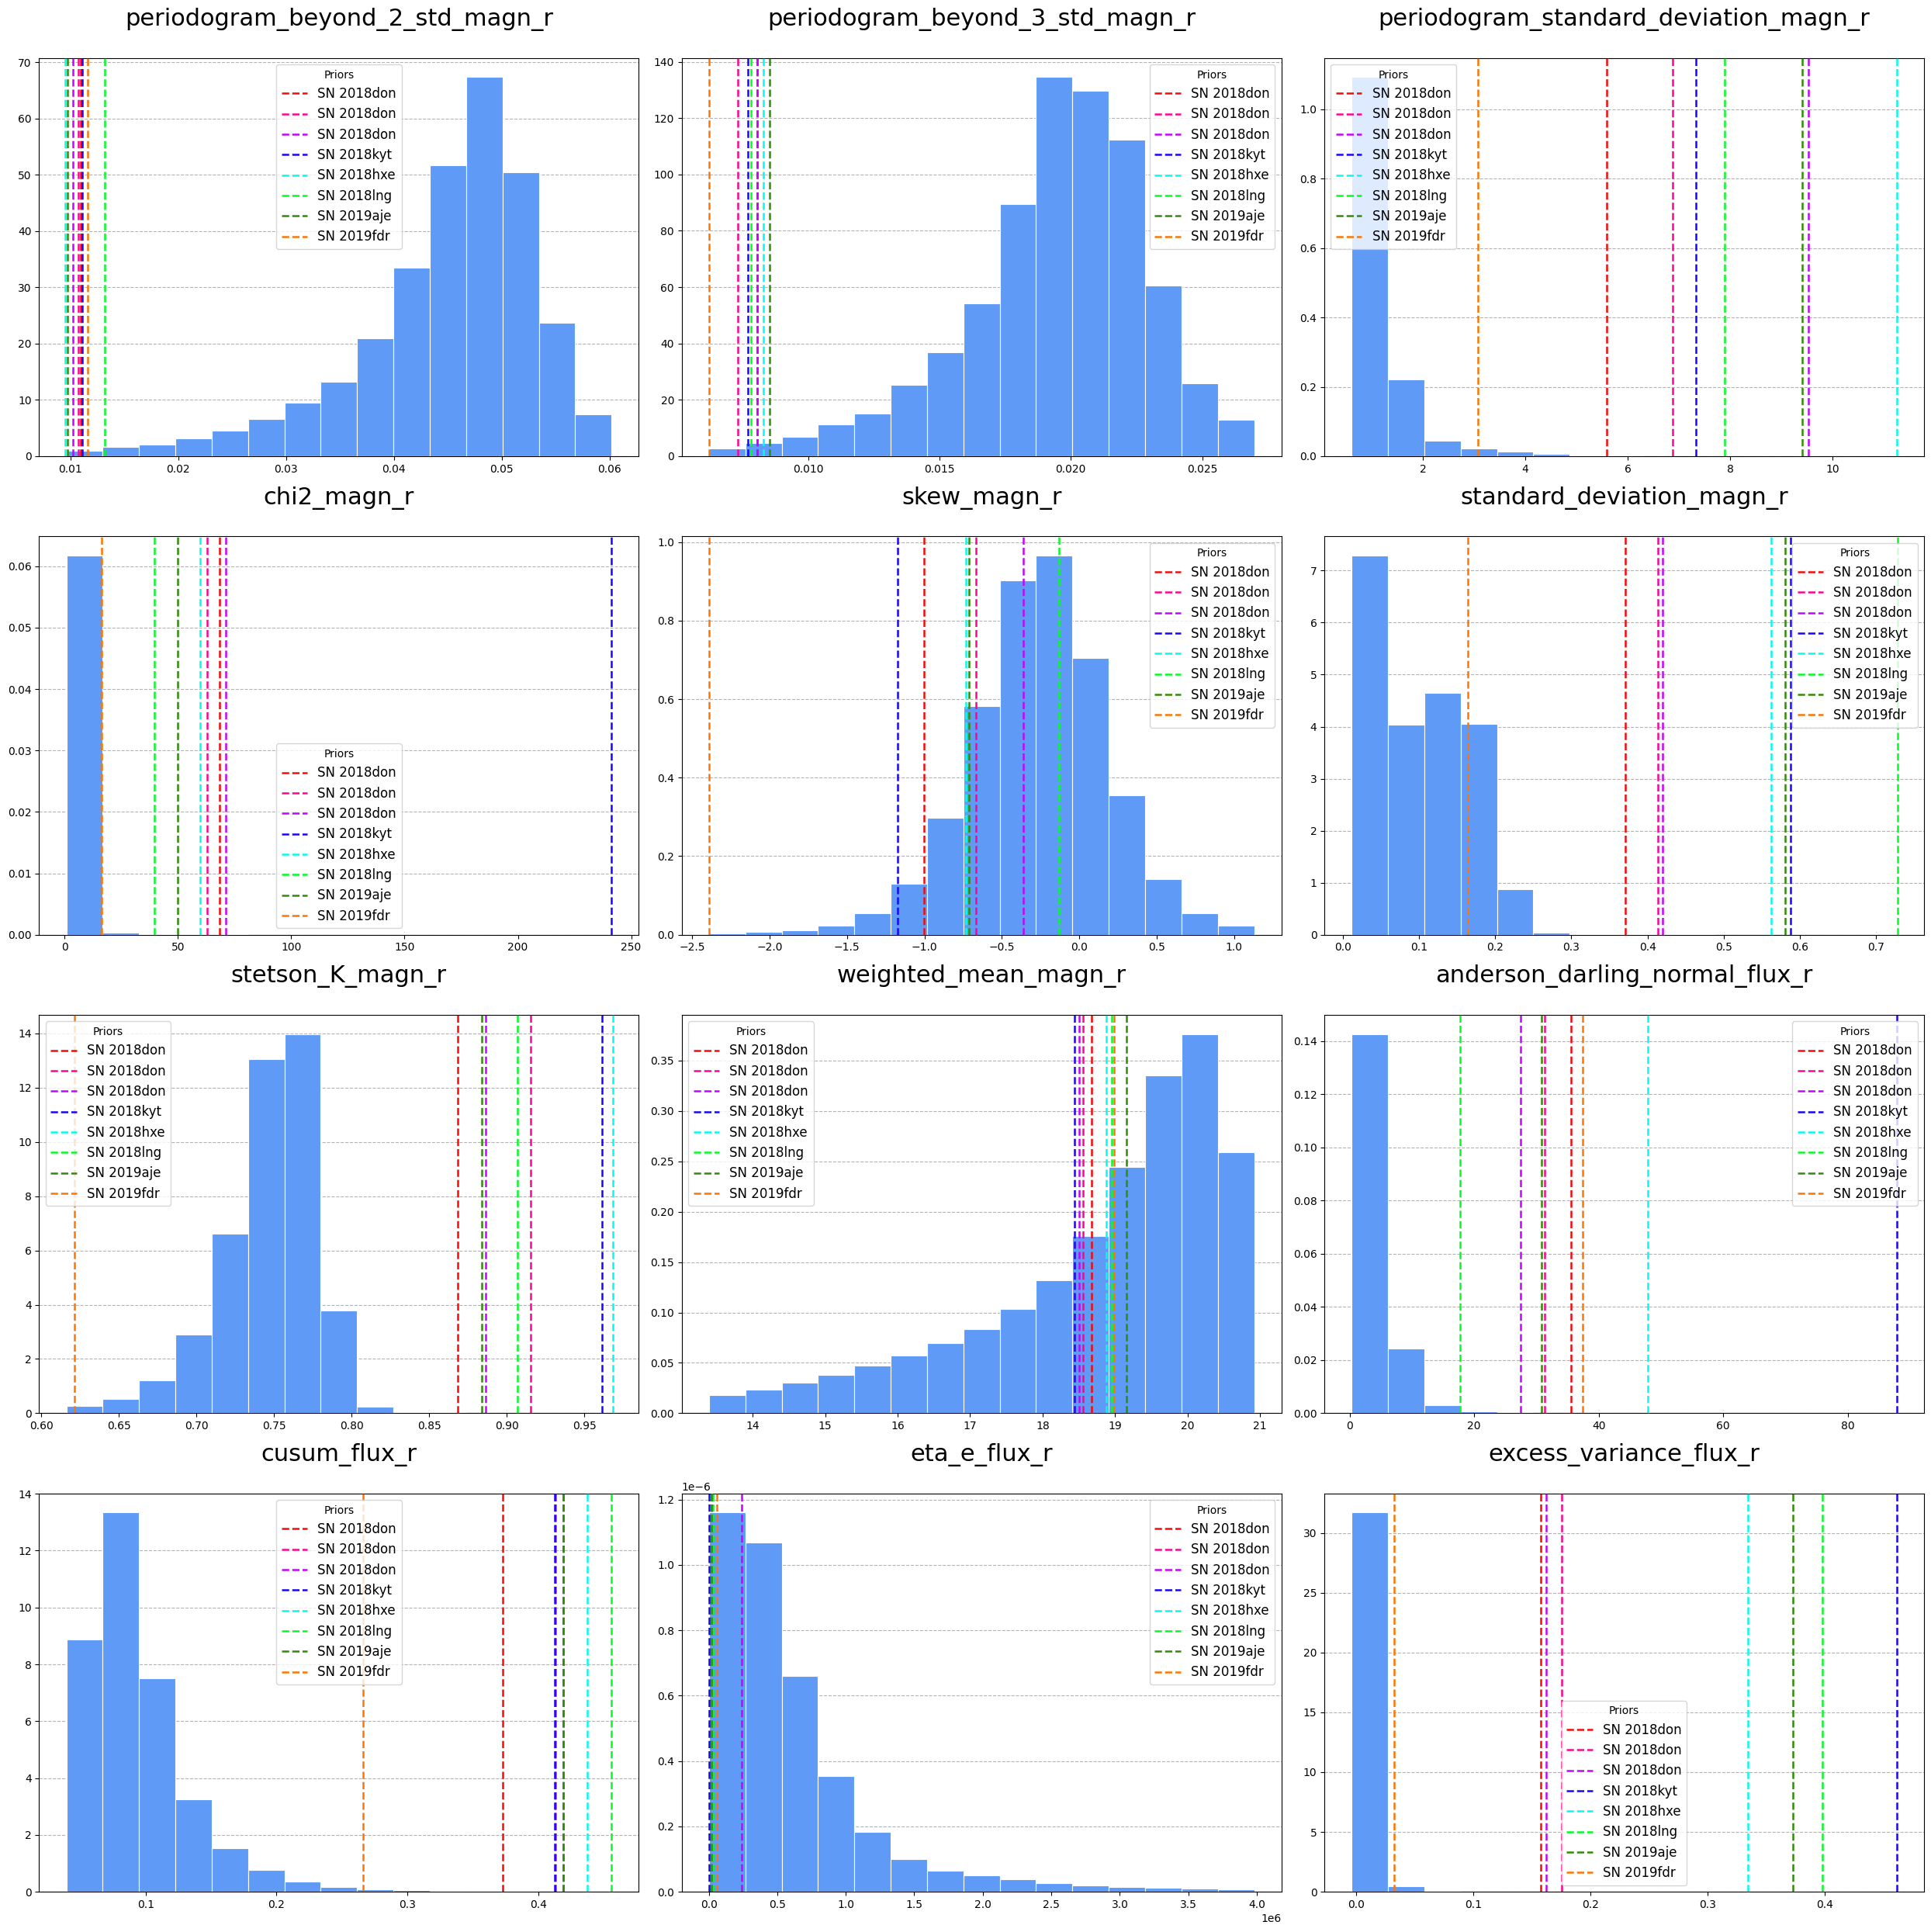

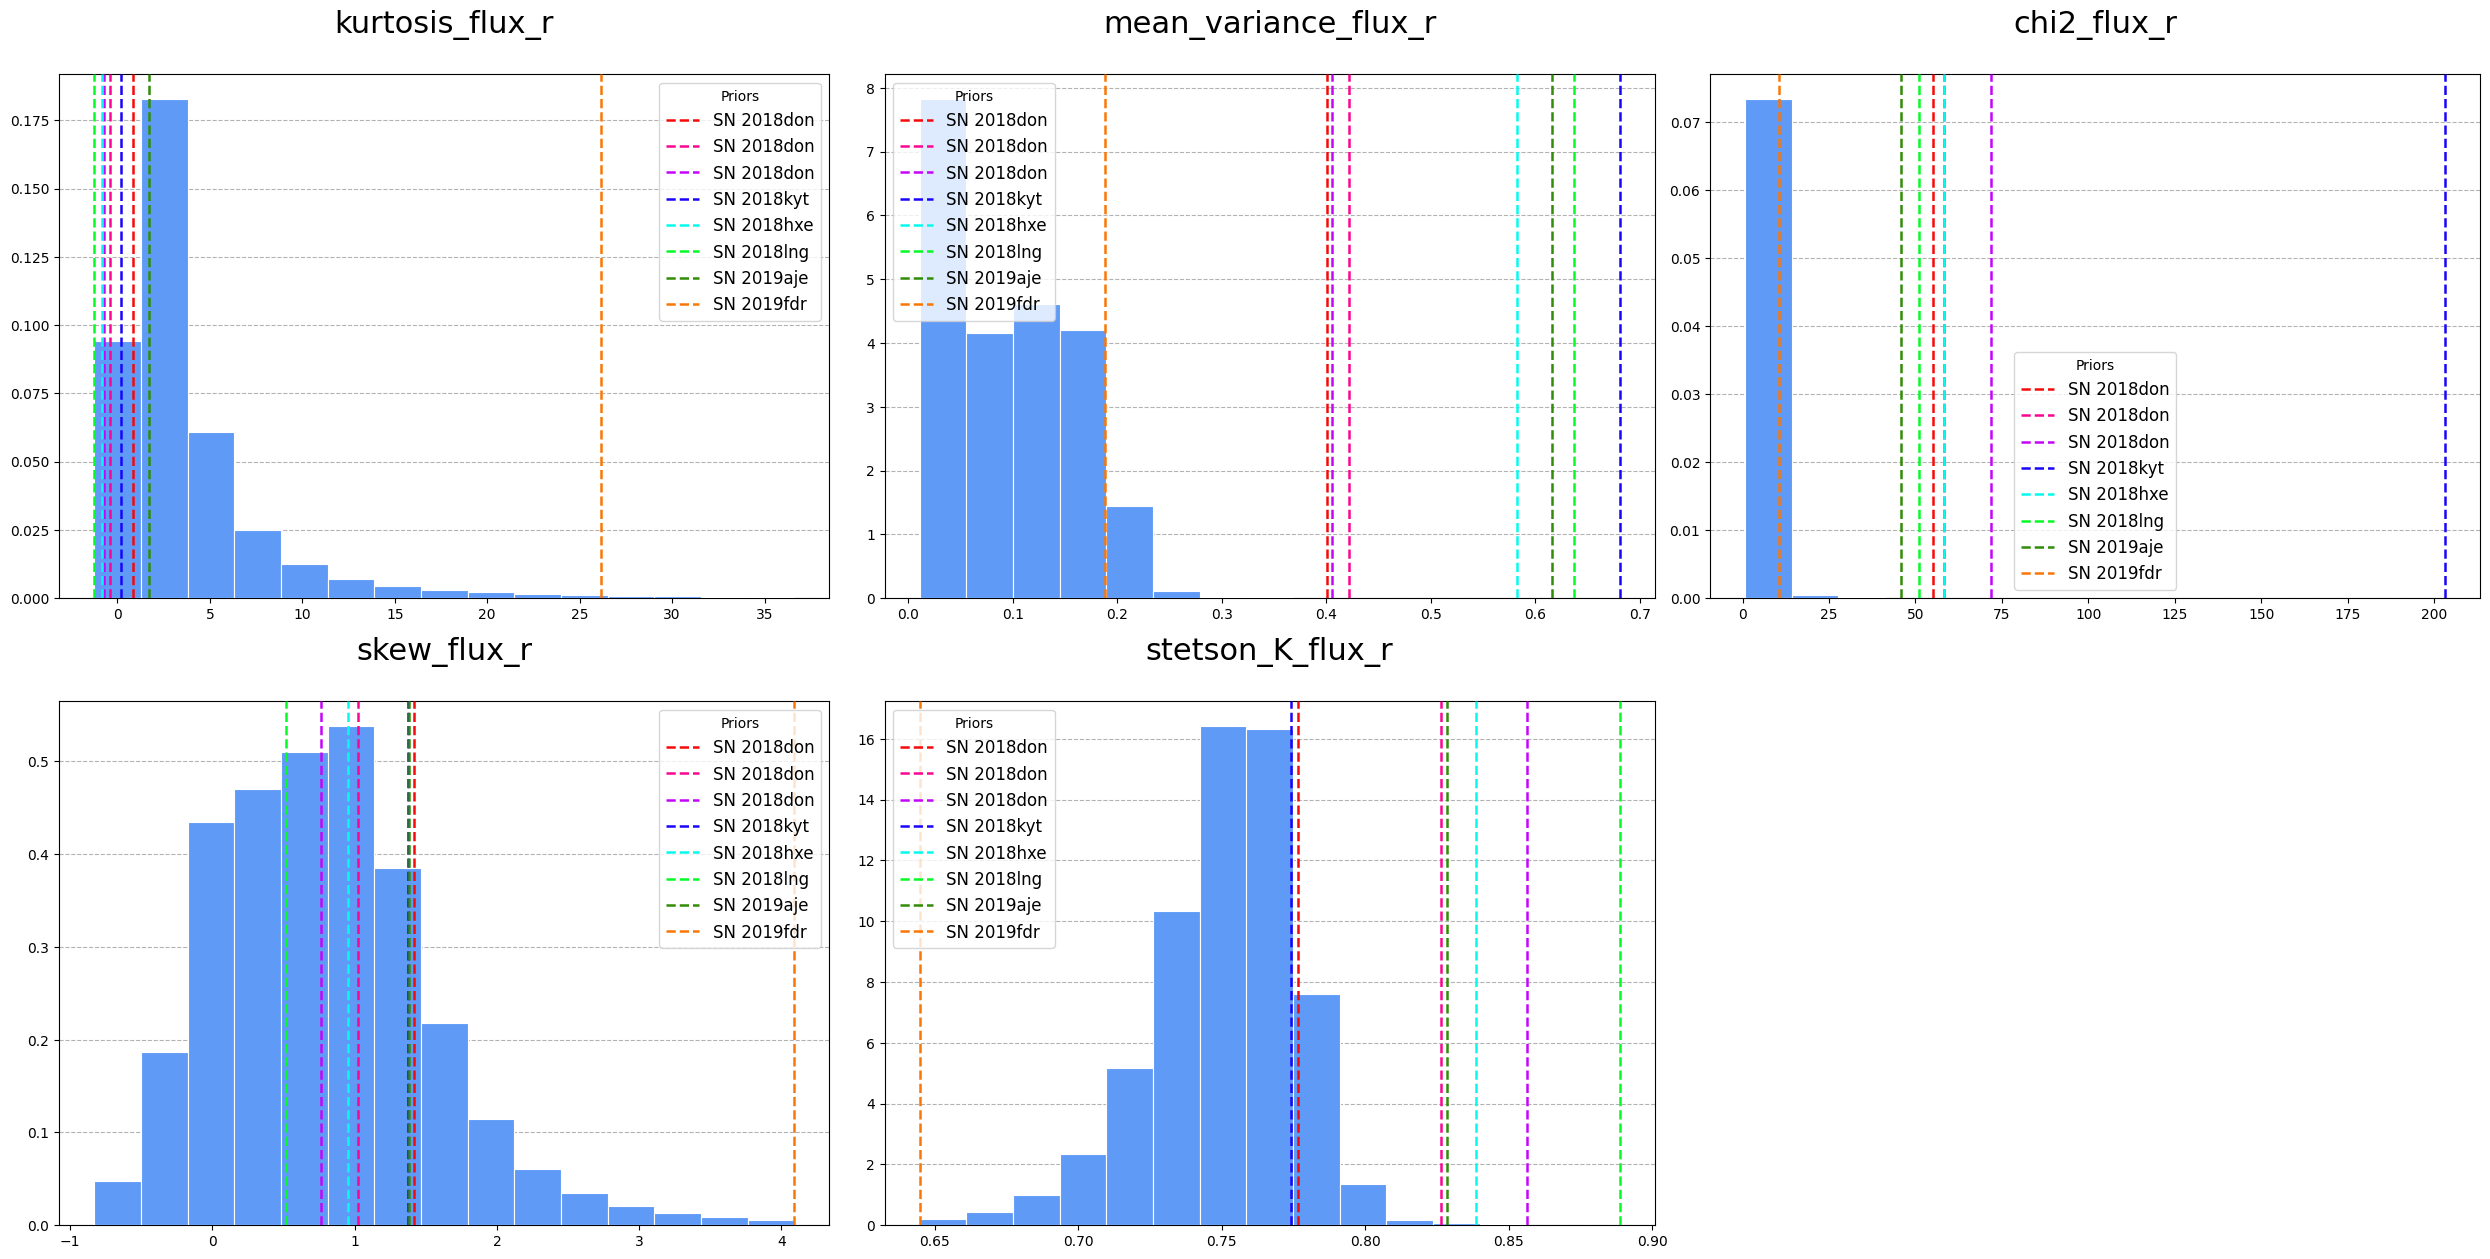

In [ ]:
#
# Verify the labels of the prior (if they're in sequence)
#
n=12
for i in range(df_copy.shape[1]):
    j = i%n
    if j == 0:
        fig = plt.figure(figsize=(25,25))
    p_lower = np.percentile(df_copy.iloc[:,i].values, 1.0)
    p_upper = np.percentile(df_copy.iloc[:,i].values, 99.0)
    temp_data = df_copy.iloc[:,i].values.copy()
    if p_lower > prior_df.iloc[:,i+1].min():
        p_lower = prior_df.iloc[:,i+1].min()
    if p_upper < prior_df.iloc[:,i+1].max():
        p_upper = prior_df.iloc[:,i+1].max()
    x = temp_data[(temp_data > p_lower) & (temp_data < p_upper)]
    plt.subplot(4, 3, j+1)
    plt.hist(x, bins=15, color='#609af7', density=True, zorder=3, edgecolor='white', linewidth=0.8)
    plt.axvline(prior_df.iloc[0,i+1], color='#f50a0a', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2018don")
    plt.axvline(prior_df.iloc[1,i+1], color='#fa0594', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2018don")
    plt.axvline(prior_df.iloc[2,i+1], color='#c505fa', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2018don")
    plt.axvline(prior_df.iloc[3,i+1], color='#1905fa', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2018kyt")
    plt.axvline(prior_df.iloc[4,i+1], color='#05faee', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2018hxe")
    plt.axvline(prior_df.iloc[5,i+1], color='#05fa26', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2018lng")
    plt.axvline(prior_df.iloc[6,i+1], color='#318c09', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2019aje")
    plt.axvline(prior_df.iloc[7,i+1], color='#fa7705', linestyle='dashed', linewidth=1.8, zorder=3, label="SN 2019fdr")
    plt.grid(axis='y', linestyle= "--",color='grey', zorder=0., alpha=0.6)
    plt.legend(title="Priors", loc="best", fontsize=12, fancybox=True)
    plt.title(df_copy.columns[i], fontsize=22, pad=30)
    plt.tight_layout()
    if (j == (n-1)) | (i == df_copy.shape[1]-1): 
        # plt.savefig(f'/media3/majumder/zwaad/zwad/slsn_data/img{i+1}.png', dpi=fig.dpi)